<h1 align=center> Project 2: Machine Learning Classifier Credit Model </h1>
<center><img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Vertical-SinFondo.png" width=500 height=400></center>
<p align=left> Created by: Emiliano Mena González and Jorge Alberto Hernández Hernández <br>
    Degree: Financial Engineer <br>
    Semester: 10th <br>
    Subject: Credit Models</p> 


<h2 align=left> Introduction </h2>
<h3 align=left> Main Objective </h3>
<p align=justified> Create a machine learning classifier credit model </p>
<h3 align=left> Proccess </h3>
<p align=justified> In order to achieve the main objective, they will be compared multiple models to get the one that has the best accuracy. </p>
<h2 align=left> Data Description </h2>
<p align=justified> The dataset of the credit score is already divided on the train and test samples. The train has 100,000 records and the test 50,000. The variables they have are the next: </p>
<ol>
  <li>ID</li>
  <li>Customer_ID</li>
  <li>Month</li>
  <li>Name</li>
  <li>Age</li>
  <li>SSN</li>
  <li>Occupation</li>
  <li>Annual_Income</li>
  <li>Monthly_Inhand_Salary</li>
  <li>Num_Bank_Accounts</li>
  <li>Num_Credit_Card</li>
  <li>Interest_Rate</li>
  <li>Num_of_Loan</li>
  <li>Type_of_Loan</li>
  <li>Delay_from_due_date</li>
  <li>Num_of_Delayed_Payment</li>
  <li>Changed_Credit_Limit</li>
  <li>Num_Credit_Inquiries</li>
  <li>Credit_Mix</li>
  <li>Outstanding_Debt</li>
  <li>Credit_Utilization_Ratio</li>
  <li>Credit_History_Age</li>
  <li>Payment_of_Min_Amount</li>
  <li>Total_EMI_per_month</li>
  <li>Amount_invested_monthly</li>
  <li>Payment_Behaviour</li>
  <li>Monthly_Balance</li>
</ol>
<p align=justify> From this variables we won´t consider on the model the ID, Customer_ID, Month, Name, Age, SSN, Occupation because they are variables that are used only to describe the customer and they shouldn´t be used to assign a customer a credit score. </p>

<h2 align=left> Models creation </h2>
<p align=justify> It was decided to prove 6 different classifiers to finally choose the model that was going to be used. This classifiers were: </p>
<ol>
  <li>Stacking (Decision Tree, Random Forest and Gradient Boosting)</li>
  <li>Decision Tree</li>
  <li>Gradient Boosting</li>
  <li>Random Forest</li>
  <li>AdaBoost</li>
  <li>Neural Network</li>
</ol>

In [1]:
import main as m
from visualizations import confusion_matrix

c:\Users\emili\OneDrive\Documentos\Escuela\10mo Semestre\Modelos de Crédito\Project2_ClassifierModel\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\emili\OneDrive\Documentos\Escuela\10mo Semestre\Modelos de Crédito\Project2_ClassifierModel\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\emili\OneDrive\Documentos\Escuela\10mo Semestre\Modelos de Crédito\Project2_ClassifierModel\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\emili\O

<h2 align=left> Results </p>
<h3 align=left> Accuracy and Cross validation </h3>
<p align=justify> To select the "best" model we need to know the performance each model had, in this case we will see the traditional accuracy (True Positives / Total Predictions) and the accuracy calculated with the Cross Validation (is used to detect if there is a problem of overfiting on the model). We can see the metrics of every model. </p>

In [2]:
m.metrics

,Model,Traditional accuracy,Cross validation accuracy,Standard deviation
0,"Stack (Decision Tree, Random Forest and Gradie...",0.89028,0.85696,0.005351
1,Decision Tree,0.85148,0.81328,0.006738
2,Gradient Boosting,0.83436,0.83296,0.003297
3,Random Forest,0.88820,0.85792,0.006441
4,Adaboost,0.82896,0.83100,0.002135
5,Neural Network (Multi Layer Perceptron),0.83008,0.82832,0.002753


<h3 align=left> Confusion Matrix </h3>
<p align=justify> Now we can see each model correct and incorrect predictions </p>

TypeError: confusion_matrix() missing 1 required positional argument: 'title'

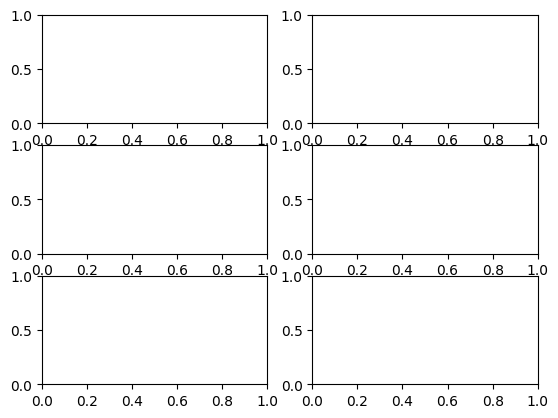

In [4]:
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(3,2)
axs[0,0] = confusion_matrix(m.y_validation, m.y_pred1, ['Poor','Standard','Good'],'Stack (Decision Tree, Random Forest and Gradient Boosting)')
axs[0,1]= confusion_matrix(m.y_validation, m.y_pred2, ['Poor','Standard','Good'],'Decision Tree')
axs[1,0]= confusion_matrix(m.y_validation, m.y_pred3, ['Poor','Standard','Good'],'Gradient Boosting')
axs[1,1]= confusion_matrix(m.y_validation, m.y_pred4, ['Poor','Standard','Good'],'Random Forest')
axs[2,0]= confusion_matrix(m.y_validation, m.y_pred5, ['Poor','Standard','Good'],'Adaboost')
axs[2,1] = confusion_matrix(m.y_validation, m.y_pred6, ['Poor','Standard','Good'],'Neural Network (Multi Layer Perceptron)')

<h3 align=left> Select the final model </h3>
<p align=justify> After comparing the six created models the one that was selected to stay as the final model was the Stack (Decision Tree, Random Forest and Gradient Boosting) Classifier, so now we can se the predictions that it made on the test datasample that we have. </p>

In [ ]:
m.test.head(10)

<h2 align=left> Conclusions </h2>